In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Select target country
target_country = 'Indonesia'
# Read the CSV File for the target country
file_path = "c:/Users/marth/MLProject/ML-Climate-Project/clean_data/master_dataset_Argentina.csv"
train_data = pd.read_csv(file_path)
input_train_data = train_data[['Year', 'total_co2_emissions', 'sea_level_rise', 'average_extreme_events']]
output_train_data = train_data[['avg_global_temp']]
print(input_train_data.shape)
print(output_train_data.shape)

# Select target country
test_country = 'Argentina'

# Read the CSV File for the target country
file_path = "c:/Users/marth/MLProject/ML-Climate-Project/clean_data/master_dataset_Mexico.csv"
test_data = pd.read_csv(file_path)
input_test_data = test_data[['Year', 'total_co2_emissions', 'sea_level_rise', 'average_extreme_events']]
output_test_data = test_data[['avg_global_temp']]
print(input_train_data.shape)
print(output_train_data.shape)

(22, 4)
(22, 1)
(22, 4)
(22, 1)


In [19]:
num_years_train = train_data['Year'].nunique() # Batch size
num_years_test = test_data['Year'].nunique() # Batch size
print(f"{num_years_train}\n{num_years_test}")

22
22


In [20]:
def temp_loss(X, Y, nnet):
  """
  Args:
    X: Num_years x 4 with dimensions of co2, sea level rise, and extreme weather (for given year)
    Y: N_batch x 
  Returns:
    loss: scalar of mse_regression_loss batch
  """
  nnet_output = nnet(X)

  # mse_loss should be a mean of the squared error of the
  mse_loss = tf.reduce_mean(tf.square(nnet_output - Y)) # Linear squared error calculation
  return mse_loss

def grad(X, Y, nnet):
  with tf.GradientTape() as tape:
    loss_value = temp_loss(X, Y, nnet)

  return tape.gradient(loss_value, nnet.weights)

In [21]:
nnet = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_years_train, activation='relu') # Linear output layer
]) # Model with 2 hidden layers with 256 hidden units each (relu activation)
nnet.build([num_years_train, 4]) # Use downsampled image as input
nnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (22, 32)               │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (22, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (22, 22)               │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,942 (7.59 KB)

 Trainable params: 1,942 (7.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# nepochs = number of times to run through the data.
nepochs = 1000  # Could probably do better with more epochs, but should suffice

for i in range(nepochs):
  grads = grad(input_train_data, output_train_data, nnet)
  optimizer.apply_gradients(zip(grads, nnet.weights))  # SGD-type update (w/ Adam)
  print("Loss at step {:03d}: {:.3f}".format(
      i, temp_loss(input_train_data, output_train_data, nnet)))

Loss at step 000: 36719.219
Loss at step 001: 36294.859
Loss at step 002: 35874.090
Loss at step 003: 35456.961
Loss at step 004: 35043.531
Loss at step 005: 34633.801
Loss at step 006: 34227.844
Loss at step 007: 33825.664
Loss at step 008: 33427.297
Loss at step 009: 33032.773
Loss at step 010: 32642.104
Loss at step 011: 32255.312
Loss at step 012: 31872.408
Loss at step 013: 31493.381
Loss at step 014: 31118.256
Loss at step 015: 30747.014
Loss at step 016: 30379.648
Loss at step 017: 30016.156
Loss at step 018: 29656.529
Loss at step 019: 29300.744
Loss at step 020: 28948.781
Loss at step 021: 28600.629
Loss at step 022: 28256.270
Loss at step 023: 27915.682
Loss at step 024: 27578.848
Loss at step 025: 27245.736
Loss at step 026: 26916.336
Loss at step 027: 26590.609
Loss at step 028: 26268.543
Loss at step 029: 25950.100
Loss at step 030: 25635.262
Loss at step 031: 25323.996
Loss at step 032: 25016.266
Loss at step 033: 24712.049
Loss at step 034: 24411.301
Loss at step 035: 24

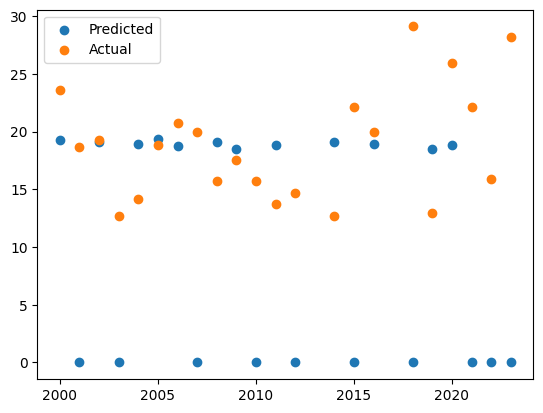

In [23]:
nnet_output_pred = nnet(input_train_data)

plt.scatter(input_train_data['Year'], nnet_output_pred[-1], label="Predicted")
plt.scatter(input_train_data['Year'], output_train_data, label="Actual")
plt.legend()

In [ ]:
# One output for average temperature for each year considered
output_size = num_years_train

nnet = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_train_data.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='relu') # Linear output layer
]) # Model with 2 hidden layers with 256 hidden units each (relu activation)
nnet.summary()    

In [ ]:
nnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=temp_loss, # Use binary cross entropy loss for binary classification (all arguements optional)
    metrics=['mae']
) # Use Binary accuracy as metric

In [ ]:
nnet.fit(input_train_data, output_train_data, epochs=100)

plt.scatter(X[np.equal(Y[:,-1], 0), 0], X[np.equal(Y[:,-1], 0), 1])
plt.scatter(X[np.equal(Y[:,-1], 1), 0], X[np.equal(Y[:,-1], 1), 1], marker='+')

c:\Users\marth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - loss: 382.0936 - mae: 18.7772 - val_loss: 454.8228 - val_mae: 20.2557
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 370.2957 - mae: 18.4435 - val_loss: 453.2532 - val_mae: 20.2152
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 367.5171 - mae: 18.3259 - val_loss: 451.8768 - val_mae: 20.1789
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 355.5220 - mae: 18.0088 - val_loss: 450.5684 - val_mae: 20.1441
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 350.4786 - mae: 17.9420 - val_loss: 449.2805 - val_mae: 20.1099
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 371.5063 - mae: 18.4537 - val_loss: 447.9735 - val_mae: 20.0750
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 370.1035 - mae: 18.4199 - val_loss: 446.6418 - val_mae: 20.0394
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 336.7860 - mae: 17.6111 - val_loss: 445.2555 - val_mae: 20.0026
Epoch 9/200
2/2 ━

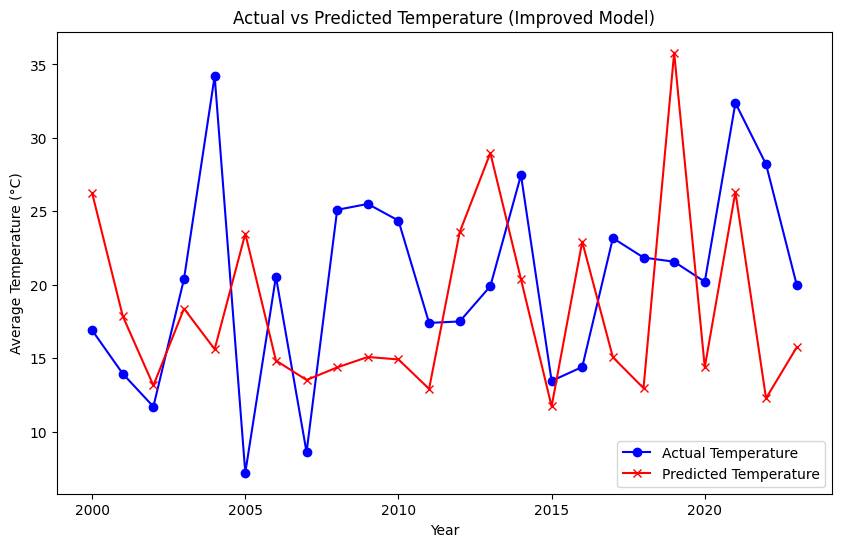

In [ ]:

# Ensure input and output data are numpy arrays
X_train = input_train_data.values  # Shape: (num_samples, 4)
Y_train = output_train_data.values  # Shape: (num_samples, 1)

X_test = input_test_data.values  # Shape: (num_samples, 4)
Y_test = output_test_data.values  # Shape: (num_samples, 1)

# Normalize the input data (optional but recommended for neural networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the updated neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 nodes
    tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer with 64 nodes
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer with 64 nodes
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer with 32 nodes
    tf.keras.layers.Dense(1)  # Output layer with 1 node (predicted temperature)
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
              loss='mean_squared_error',
              metrics=['mae'])

# Train the updated model
history = model.fit(X_train, Y_train, epochs=200, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

# Predict on the test data
Y_pred = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(input_test_data['Year'], Y_test, label='Actual Temperature', color='blue', marker='o')
plt.plot(input_test_data['Year'], Y_pred, label='Predicted Temperature', color='red', marker='x')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Temperature (Improved Model)')
plt.legend()
plt.show()